In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv
/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv


In [2]:
# Read data
df = pd.read_csv("/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv")

In [3]:
# Converted 'date' column to datetime to plot with matplotlib later
df['date'] = pd.to_datetime(df['date'])

# An overview of the data
df.head(n=3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...


# Task 1

## What vaccines are used ?

In [4]:
def get_vaccines(cdf: pd.DataFrame):
    vaccines = cdf['vaccines'].unique()
    distinct_vaccines = []
    
    for vaccine in vaccines:
        for v in vaccine.split(','):
            v = v.strip()
            if v not in distinct_vaccines:
                distinct_vaccines.append(v)
    return distinct_vaccines


In [5]:
vaccines = get_vaccines(df)
print("Vaccines used:")
print(', '.join(vaccines))

Vaccines used:
Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac, Sputnik V, CanSino, Moderna, Covaxin, Sinopharm/Wuhan, ZF2001, Abdala, Soberana02, COVIran Barekat, QazVac, Sinopharm/HayatVax, EpiVacCorona, Medigen


## Which vaccines are used in which countries?

In [6]:
vaccines_country = {}
people_vaccinated = {}
vaccinations_percentage = {}

countries = df['country'].unique()

for vaccine in vaccines:
    vaccines_country[vaccine] = []

In [7]:
for country in countries:
    country_df = df.loc[df['country'] == country]
    country_vaccinations = country_df['people_vaccinated'].sum()
    people_vaccinated[country] = country_vaccinations
    c_vaccines = country_df['vaccines'].unique()
    
    country_df = country_df.dropna(subset=['people_vaccinated_per_hundred'])
    if not country_df.empty:
        vaccinations_percentage[country] = list(country_df['people_vaccinated_per_hundred'])[-1]
    else:
        vaccinations_percentage[country] = 0
    
    for vaccine in c_vaccines:
        for v in vaccine.split(','):
            v = v.strip()
            vaccines_country[v].append(country)

In [8]:
for vaccine in vaccines_country:
    print(f"Vaccine: {vaccine}:")
    print(f"Number of countries using it: {len(vaccines_country[vaccine])}")
    print(f"List of countries using it: \n{vaccines_country[vaccine]}")
    print(f"-"*200, "\n")

Vaccine: Johnson&Johnson:
Number of countries using it: 51
List of countries using it: 
['Afghanistan', 'Austria', 'Belgium', 'Bolivia', 'Brazil', 'British Virgin Islands', 'Bulgaria', 'Cambodia', 'Colombia', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Egypt', 'Estonia', 'France', 'French Polynesia', 'Germany', 'Greece', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Jamaica', 'Laos', 'Latvia', 'Libya', 'Lithuania', 'Luxembourg', 'Malawi', 'Malta', 'Mexico', 'Moldova', 'Morocco', 'Netherlands', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Somalia', 'South Africa', 'South Korea', 'Spain', 'Sudan', 'Syria', 'Tanzania', 'Tunisia', 'United States', 'Yemen']
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

Vaccine: Oxford/AstraZeneca:
Number of countries using it: 182
List of countries using it: 
['Afghanistan', 'Alba

## Histogram of vaccines by number of countries using it

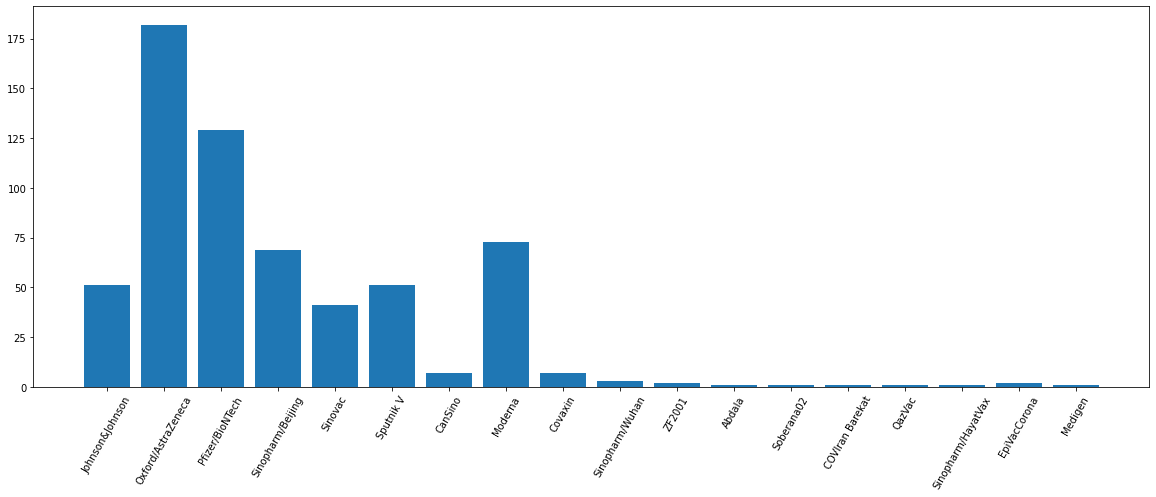

In [9]:
vaccine_counts = {}
for v in vaccines_country:
    vaccine_counts[v] = len(vaccines_country[v])

plt.rcParams["figure.figsize"] = (20,7)
plt.bar(vaccine_counts.keys(), vaccine_counts.values())
plt.xticks(rotation=60)
plt.show()

## Country with highest vaccinations

In [10]:
max_v_country = max(people_vaccinated, key=people_vaccinated.get)
print("Country with highest vaccinations: ",max_v_country)

Country with highest vaccinations:  India


## Number of people vaccinated over time in country with highest vaccinations

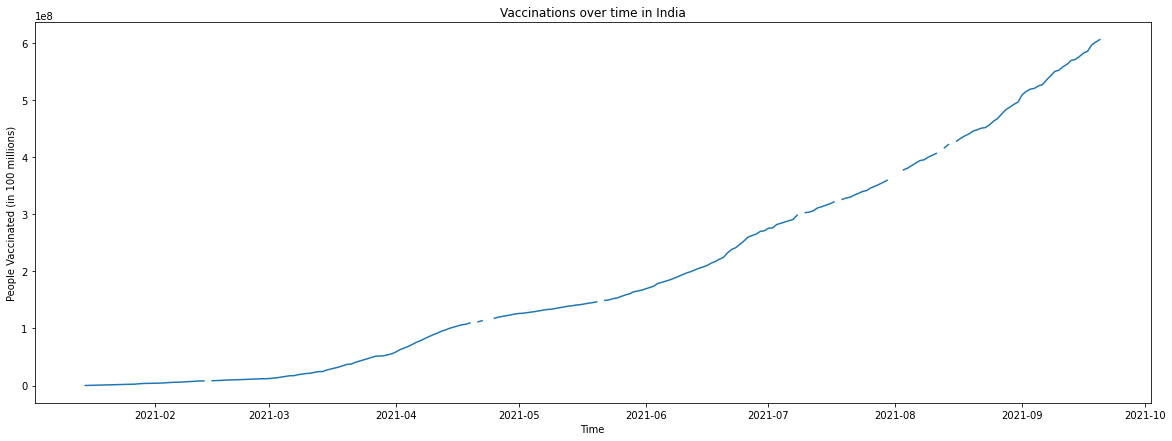

In [11]:
max_v_cntry_df = df.loc[df['country'] == max_v_country]
max_v_cntry_df = max_v_cntry_df.sort_values(by='date')

plt.plot(max_v_cntry_df['date'], max_v_cntry_df['people_vaccinated'])

plt.title(f"Vaccinations over time in {max_v_country}")
plt.xlabel("Time")
plt.ylabel("People Vaccinated (in 100 millions)")

plt.show()

## What country has vaccinated a larger percent from its population?

In [12]:
max_per_country = max(vaccinations_percentage, key=vaccinations_percentage.get)
print("Country which has vaccinated larger percent of population: ", max_per_country)
print("Percent of population vaccinated: ", vaccinations_percentage[max_per_country])

Country which has vaccinated larger percent of population:  Gibraltar
Percent of population vaccinated:  118.27


## Vaccination percentage over time in country with highest percentage of vaccinations

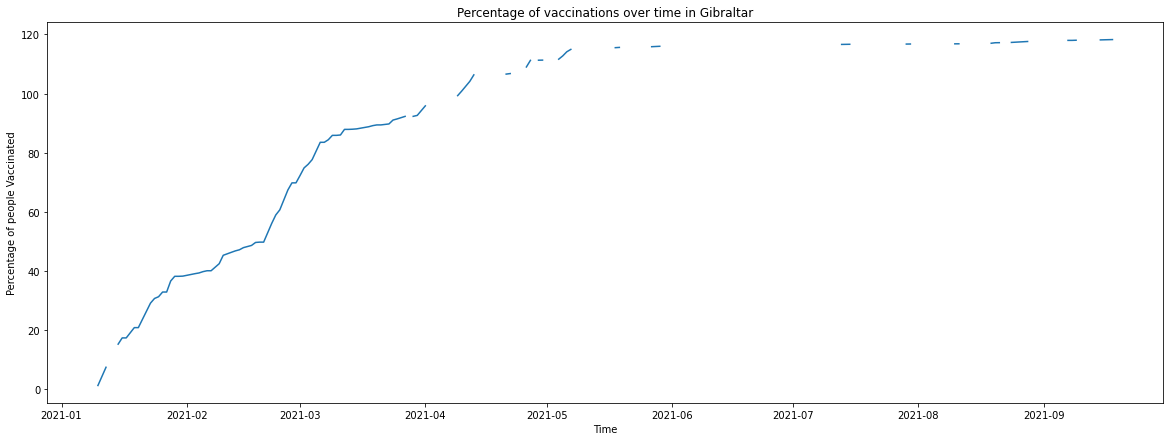

In [13]:
max_per_cntry_df = df.loc[df['country'] == max_per_country]
max_per_cntry_df = max_per_cntry_df.sort_values(by='date')

plt.plot(max_per_cntry_df['date'], max_per_cntry_df['people_vaccinated_per_hundred'])

plt.title(f"Percentage of vaccinations over time in {max_per_country}")
plt.xlabel("Time")
plt.ylabel("Percentage of people Vaccinated")

plt.show()